In [49]:
import numpy as np

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

def pad(img, kernel_size, pad_with=pad_with):
    w, h = img.shape
    padding = int((kernel_size-1)/2)
    return np.pad(img, padding, pad_with)

def mean(img, kernel_size):
    w, h = img.shape
    out = [[np.mean(img[i: i+kernel_size, k: k+kernel_size]) for i in range(w-kernel_size+1)] for k in range(h-kernel_size+1)]
    out = np.array(out)
    return out

def wiener(img, kernel_size=3):
    img = np.asarray(img)
    img_pad = pad(img, kernel_size)
    
    local_mean = mean(img_pad, kernel_size)
    local_var = mean(img_pad**2, kernel_size)
    noise = np.mean(local_var.ravel())
    
    out = img - local_mean
    out *= (1-noise/(local_var+1e-8))
    out += local_mean
    out = np.where(local_var<noise, local_mean, out)
    return np.uint8(out)
    
# a = np.ones((3, 3))
# b = pad(a, 3)
# print(a)
# print(b)

In [50]:
img.shape
c = pad(img, 3)
c.shape

(514, 514)

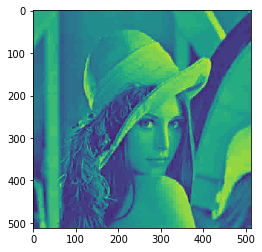

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./image/lena_gray.jpg')

plt.imshow(img)
plt.show()

In [53]:
c = wiener(img)
c.shape

(512, 512)

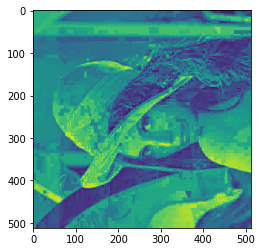

In [54]:
plt.imshow(c)
plt.show()

In [57]:
def correlate(in1, in2):
    in1 = np.asarray(in1)
    in2 = np.asarray(in2)
    index_inv2 = (slice(None, None, -1),) * in2.ndim
    conj_2 = in2[index_inv2].conj()
    out = sig.convolve(in1, conj_2, mode='same')
    return out

def mean(inp, size):
    kernel = np.ones(size) / np.product(size, axis=0)
    out = sig.convolve2d(inp, kernel, 'same')
    return out
    
def wiener(img, size=None, noise=None):
    img = np.asarray(img)
    if size is None: 
        size = [3] * img.ndim
    size = np.asarray(size)

    local_mean = correlate(img, np.ones(size)) / np.product(size, axis=0)
    
    
    local_var = correlate(img**2, np.ones(size)) / np.product(size, axis=0)
    print(local_var[:3, :3])
    if noise is None:
        noise = np.mean(np.ravel(local_var), axis=0)
    
    out = img - local_mean

    out *= (1-noise/local_var)
    out += local_mean
    out_ = np.where(local_var<noise, local_mean, out)
    return np.uint8(out_)
b = wiener(img_)
print(img_.shape)
print(b.shape)
    

[[[  20.25925926   40.77777778   30.14814815]
  [  35.81481481   64.37037037   46.55555556]
  [  46.37037037   63.77777778   41.92592593]]

 [[  25.81481481   59.25925926   45.92592593]
  [  50.14814815   98.88888889   78.03703704]
  [  66.66666667  109.           84.96296296]]

 [[  26.77777778   62.18518519   48.92592593]
  [  57.03703704  107.40740741   83.37037037]
  [  68.25925926  114.11111111   88.62962963]]]
(300, 300, 3)
(300, 300, 3)


In [18]:
def mean(img, kernel_size):
    w, h = img.shape
    out = [[np.mean(img[i: i+kernel_size, k: k+kernel_size]) for i in range(w-kernel_size+1)] for k in range(h-kernel_size+1)]
    out = np.array(out)
    return out
# c = [[np.mean(b[i: i+3, k: k+3]) for i in range(3)] for k in range(3)]
# c = np.array(c)
# print(c)
c = mean(b, 3)
c

array([[ 0.44444444,  0.66666667,  0.44444444],
       [ 0.66666667,  1.        ,  0.66666667],
       [ 0.44444444,  0.66666667,  0.44444444]])

In [88]:
import scipy.signal as sig

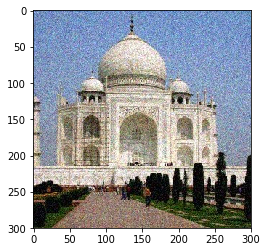

In [55]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_ = mpimg.imread('./image/a.jpg')
# noise = 10*np.random.normal(size=img.shape[:3])
# img_ = img+noise
# img_ = np.zeros(img.shape)
# for i in range(img.shape[-1]):
#     img_[:, :, i] = img[:, :, i] + noise
# img_ = np.uint8(img_)
# img += 0.1 * np.random.normal((512, 512))
plt.imshow(img_, cmap='gray')
plt.show()

In [4]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# for c, ax in zip(range(3), axs):
#     tmp_im = np.zeros(img.shape, dtype="uint8")
#     tmp_im[:,:,c] = img_[:,:,c]
#     ax.imshow(tmp_im)
#     ax.set_axis_off()

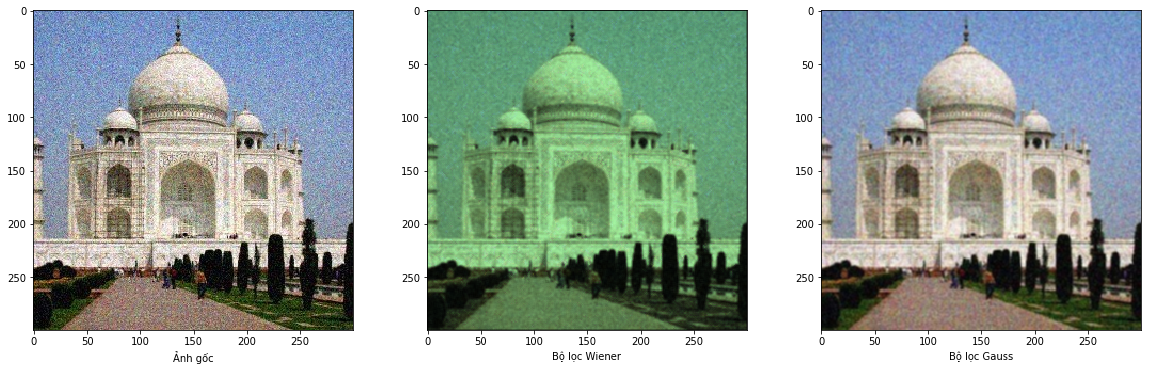

In [58]:
import cv2
a = cv2.GaussianBlur(img_, (3, 3), 1)
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# for c, ax in zip(range(3), axs):
#     tmp_im = np.zeros(img.shape, dtype="uint8")
#     tmp_im[:,:,c] = a[:,:,c]
#     ax.imshow(tmp_im)
#     ax.set_axis_off()
plt.figure(figsize=(20, 20))
plt.subplot(331)
plt.xlabel('Ảnh gốc')

plt.imshow(img_)

plt.subplot(332)
plt.xlabel('Bộ lọc Wiener')
plt.imshow(b)

plt.subplot(333)
plt.xlabel('Bộ lọc Gauss')
plt.imshow(a)



# plt.grid('off')
# plt.xticks([])
# plt.yticks([])
plt.show()

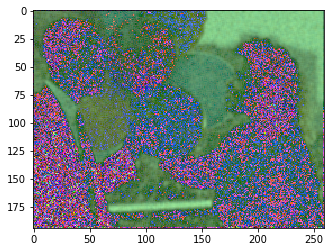

In [12]:
b = sig.wiener(img_)
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# for c, ax in zip(range(3), axs):
#     tmp_im = np.zeros(img.shape, dtype="uint8")
#     tmp_im[:,:,c] = b[:,:,c]
#     ax.imshow(tmp_im)
#     ax.set_axis_off()
b = np.uint8(b)
plt.imshow(b)
plt.show()

In [21]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# for c, ax in zip(range(3), axs):
#     tmp_im = np.zeros(img.shape, dtype="uint8")
#     tmp_im[:,:,c] = a[:,:,c]
#     ax.imshow(tmp_im)
#     ax.set_axis_off()
plt.imshow(a, cmap='gray')
plt.show()

NameError: name 'plt' is not defined

In [73]:
psf = np.ones((5, 5)) / 25
noise = np.random.standard_normal(img.shape) * 10
noise_img = img + noise

# noise_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
# plt.imshow(noise_img, cmap='gray')
plt.savefig('image/lena_.jpg', noise_img)

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

In [32]:
# restore_img = restoration.wiener(noise_img, psf, balance=1)
# plt.imshow(restore_img)
# plt.show()

In [33]:
# restore_img_ = wiener(noise_img)
# plt.imshow(restore_img_)
# plt.show()

In [34]:
# un_img, _ = restoration.unsupervised_wiener(noise_img, psf)
# print(un_img.shape)
# # print(len(un_img))
# plt.imshow(un_img)
# plt.show()

In [35]:
# gauss_fil = np.loadtxt('./filter/gauss.txt')
# gauss_fil = gauss_fil / sum(gauss_fil)
# gauss_img = convolve2d(noise_img, gauss_fil, mode='same')
# plt.imshow(gauss_img)
# plt.show()

In [36]:
# gauss_img = convolve2d(gauss_img, gauss_fil, mode='same')
# plt.imshow(gauss_img)
# plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d, wiener, correlate, csd

In [38]:
# def wiener_filter(noise_img, fil, noise=None):
#     size_window = [3] * noise_img.ndim # filter window
#     lMean = correlate(noise_img, np.ones(size_window), 'same') / np.product(size_window, axis=0)
#     lVal = correlate(noise_img**2, np.ones(size_window, 'same')) / np.product(size_window, axis=0) - lMean**2
#     if noise is None:
#         noise = np.mean(np.ravel(lVal), axis=0)
#     noise_img_fft = np.fft.rfft2(noise_img)
# #     f, Pxx = csd(noise_img_fft, noise_img_fft) 
#     kernel = np.fft.rfft2(fil) + noise
#     h = np.conj(kernel) / (np.abs(kernel)**2+1e-3)
#     res = np.irfft2(h*noise_img_fft)
#     return res

In [39]:
# def wiener_filter(noise_img, kernel, K=10):
#     img = np.copy(noise_img)
#     kernel = np.pad(kernel, [(0, img.shape[0]-kernel.shape[0]), ([0, img.shape[1]-kernel.shape[1]])], 'constant')
#     kernel_fft = np.fft.fft2(kernel)
#     fil = np.conj(kernel_fft) / (np.abs(kernel_fft)**2 + K)
#     img_fft = np.fft.fft2(img)
#     img_fil = img_fft * fil
#     img_fil = np.fft.ifft2(img_fil)
#     return np.uint8(img_fil)

In [40]:
# wiener_filter(noise_img, gauss_fil)


In [41]:
# a, b = csd(noise_img, noise_img, nperseg=512)
# print(a.shape)
# print(b.shape)
# print(noise_img.shape)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d

In [2]:
fil_path = './filter/sobel_X.txt'
# fil_path = './filter/gauss.txt'
img_path = './image/lena.jpg'
fil = np.loadtxt(fil_path) 
# fil = fil / np.sum(fil)
img = mpimg.imread(img_path)
print(fil.shape, img.shape)

(3, 3) (512, 512, 3)


In [61]:
def convolve(img, fil):
    n_channel = img.shape[-1]
    img_fil = []
    for i in range(n_channel):
        comp_i = convolve2d(img[:, :, i], fil, mode='same', boundary='symm')
        img_fil.append(comp_i)
    out = np.stack(img_fil, axis=2).astype('uint8')
    return out


In [67]:
def wiener(noise_img, R=1, SNR=1000):
#     kernel = np.ones((R, R)) 
#     kernel = kernel / np.sum(kernel)
    width, height = noise_img.shape[:2]
    kernel = np.zeros((width, height))
    print(int(width/2))
    kernel[int(width/2), int(height/2)-R:int(height/2)+R+1] = 1
#     kernel[int(width/2)-R: int(width/2)+R+1, int(height/2)-R: int(height/2)+R+1] = 1
    dummy = np.copy(noise_img)
#     kernel = np.pad(kernel, [(0, width - kernel.shape[0]), (0, length - kernel.shape[1])], 'constant')
    print(kernel[250:260, 250:260])
    print(kernel[256, 256])
    kernel = kernel / kernel.sum()
    #fft
    dummy = np.fft.fft2(dummy)
    kernel = np.fft.fft2(kernel)
#     kernel = np.conjugate(kernel) / (np.abs(kernel)**2 + 1/SNR)
    kernel = 1/(kernel+1/SNR)
    n_channel = noise_img.shape[-1]
    img_fil = []
    for i in range(n_channel):
        comp_i = dummy[:, :, i] * kernel
        comp_i = np.abs(np.fft.fftshift(comp_i))
        img_fil.append(np.abs(np.fft.ifft2(comp_i)))
        
    out = np.stack(img_fil, axis=2).astype('uint8')
    return out

256
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1.0


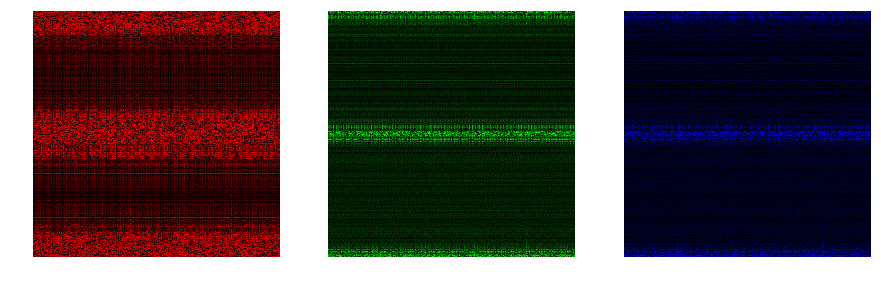

In [69]:
a = wiener(noise_img, R=50, SNR=1000)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(img.shape, dtype="uint8")
    tmp_im[:,:,c] = a[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

In [6]:
def noise_generation(img, psd=0.1):
    noise = np.random.normal(size=img.shape[:2], scale=psd**0.5)
    return noise
    
def make_noise(img, noise):
#     noise = np.random.normal(size=img.shape[:2], scale=psd**0.5)
#     print(noise)
    n_channel = img.shape[-1]
    img_out = []
    for i in range(n_channel):
        comp_i = img[:, :, i] + noise
        img_out.append(comp_i)
    out = np.stack(img_out, axis=2).astype('uint8')
    return out

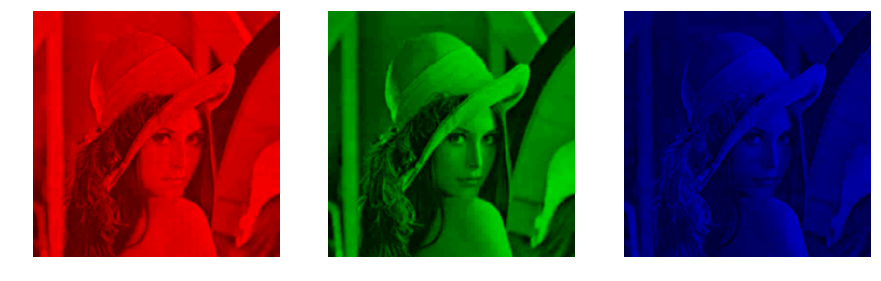

In [56]:
gauss_fil = np.loadtxt('./filter/gauss.txt')
gauss_fil = gauss_fil / np.sum(gauss_fil)
noise_img = convolve(img, gauss_fil)
# noise_img = noise_img[:, :, 0]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(img.shape, dtype="uint8")
    tmp_im[:,:,c] = noise_img[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

In [76]:
noise_img.ndim


2

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# for c, ax in zip(range(3), axs):
#     tmp_im = np.zeros(img.shape, dtype="uint8")
#     tmp_im[:,:,c] = img[:,:,c]
#     ax.imshow(tmp_im)
#     ax.set_axis_off()

In [ ]:
# n_channel = img.shape[-1]
# out_ = []
# for i in range(n_channel):
#     comp_i = convolve2d(img[:, :, i], fil, mode='same', boundary='symm')
#     out_.append(comp_i)
# out = np.stack(out_, axis=2).astype('uint8')

In [ ]:
# print(out.shape)

# print(out[:10, :10, 0])

In [ ]:
# plt.imshow(out, label='Output')
# plt.show()
# plt.imshow(img, label='Original')
# # plt.legend()
# plt.show()

In [ ]:
# sobel_X = np.loadtxt('./filter/sobel_X.txt')
# sobel_Y = np.loadtxt('./filter/sobel_Y.txt')
# out = []
# n_channel = img.shape[-1]
# for i in range(n_channel):
#     sx = convolve2d(img[:, :, i], sobel_X, mode='same', boundary='symm')
#     sy = convolve2d(img[:, :, i], sobel_Y, mode='same', boundary='symm')
#     out.append((sx**2+sy**2)**0.5)
# #     out.append(sy)
# out_ = np.stack(out, axis=2).astype('uint8')
# plt.imshow(out_, cmap=plt.cm.gray)
# plt.show()